In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# fetching dataset
heart_disease = fetch_ucirepo(id=45) 

# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets
z = y.copy()
z['num'] = np.where(y['num'] != 0, 1, 0)

heartDisease_combined = pd.concat([X,z], axis=1) # combines labels and features into one DF
heartDisease_combined.head()

# Splitting into continuous and categorical variables
cont_feat = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Data Exploration

In [3]:
# Printing summary stats of each column
heartDisease_combined.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [4]:
# Shows with features has missing values
heartDisease_combined.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [5]:
# Printing correlation 
print('Covariance:')
heartDisease_combined.cov()

Covariance:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,81.697419,-0.411995,0.903744,45.328678,97.787489,0.381614,1.338797,-81.423065,0.389220,2.138850,0.901034,3.066396,2.240487,1.006579
sex,-0.411995,0.218368,0.004524,-0.530107,-4.836994,0.007967,0.010065,-0.520184,0.032096,0.055436,0.010808,0.040964,0.344950,0.064564
cp,0.903744,0.004524,0.921841,-0.609632,3.595141,-0.013671,0.064488,-7.344863,0.173235,0.225493,0.089961,0.210512,0.494972,0.198610
trestbps,45.328678,-0.530107,-0.609632,309.751120,118.573339,1.099207,2.566455,-18.258005,0.535473,3.865638,1.273053,1.639436,4.573810,1.324908
chol,97.787489,-4.836994,3.595141,118.573339,2680.849190,0.181496,8.811521,-4.064651,1.491345,2.799282,-0.129598,5.791385,1.429834,2.200872
fbs,0.381614,0.007967,-0.013671,1.099207,0.181496,0.126877,0.024654,-0.063996,0.004295,0.002377,0.013147,0.048394,0.048981,0.004492
restecg,1.338797,0.010065,0.064488,2.566455,8.811521,0.024654,0.989968,-1.897941,0.039670,0.131850,0.082126,0.119706,0.047342,0.084027
thalach,-81.423065,-0.520184,-7.344863,-18.258005,-4.064651,-0.063996,-1.897941,523.265775,-4.063307,-9.112209,-5.435501,-5.686270,-12.399734,-4.762945
exang,0.389220,0.032096,0.173235,0.535473,1.491345,0.004295,0.039670,-4.063307,0.220707,0.157216,0.074618,0.064162,0.300155,0.101272
oldpeak,2.138850,0.055436,0.225493,3.865638,2.799282,0.002377,0.131850,-9.112209,0.157216,1.348095,0.413219,0.322753,0.769517,0.246010


# Data Visualisation
- cp exang oldpeak slope ca thal 
- cont feat: 'age', 'trestbps', 'chol', 'thalach', 'oldpeak' 

#### Positive correlation: thal, ca, oldpeak, exang, cp (increase ==> increase heart disease)
- cp: chest pain type (1 to 4) ==> 1 is the significant indicator
- ca: number of major vessels (0-3) colored by flourosopy
- oldpeak: ST depression induced by exercise relative to rest
- exang: exercise induced angina (1 = yes; 0 = no)
- negative correlation: thalach (decrease ==> increase heart disease)
- thalach: maximum heart rate achieved

Text(0.5, 1.0, 'Correlation Heatmap')

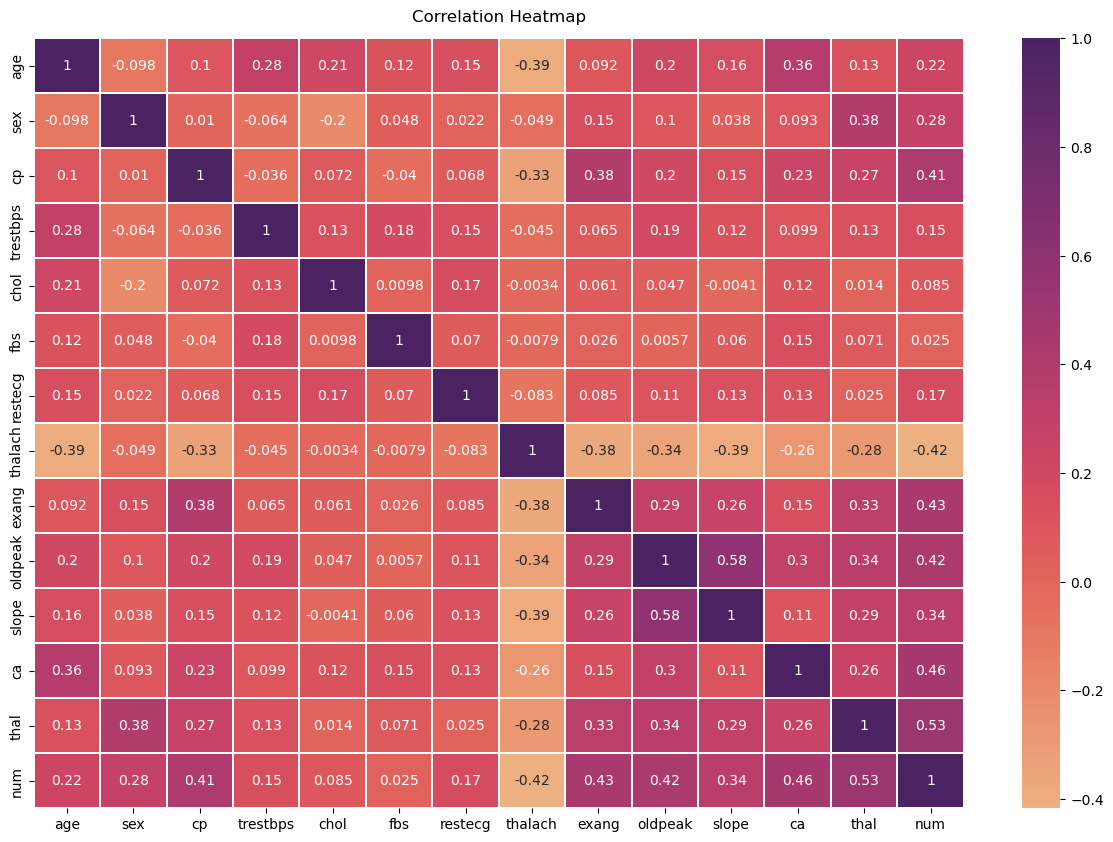

In [6]:
# Printing correlation heatmap, note that darker colours means highly correlated, lighter = not very correlated
plt.figure(figsize = (15,10))
corrHeatmap = sns.heatmap(heartDisease_combined.corr(), linewidth = 0.01, annot = True, cmap = 'flare');

corrHeatmap.set_title('Correlation Heatmap', fontdict = {'fontsize':12}, pad = 12)

In [7]:
# Printing correlation values
heartDisease_combined.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.362605,0.127389,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.093185,0.380936,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233214,0.265246,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098773,0.133554,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.119000,0.014214,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.145478,0.071358,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.128343,0.024531,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.264246,-0.279631,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145570,0.329680,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.295832,0.341004,0.424510


<Axes: >

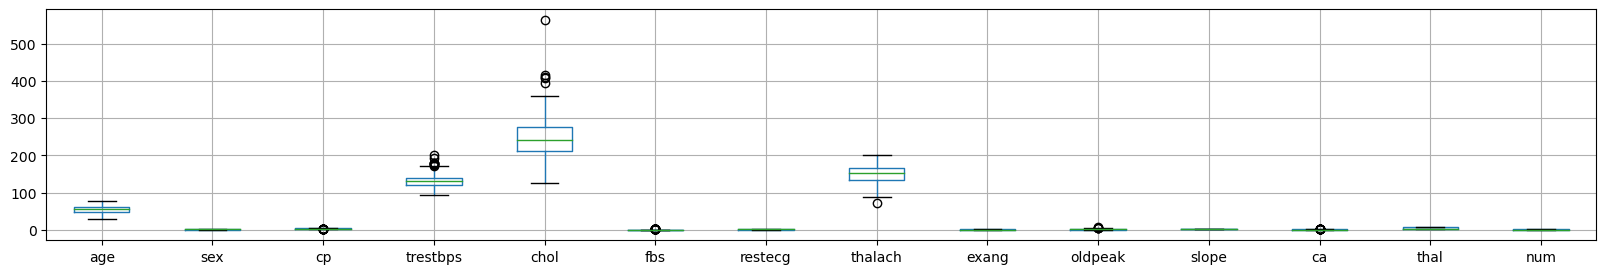

In [8]:
# Printing box plot of all features
%matplotlib inline

heartDisease_combined.boxplot(figsize=(20,3))
#chol has abnormally high value

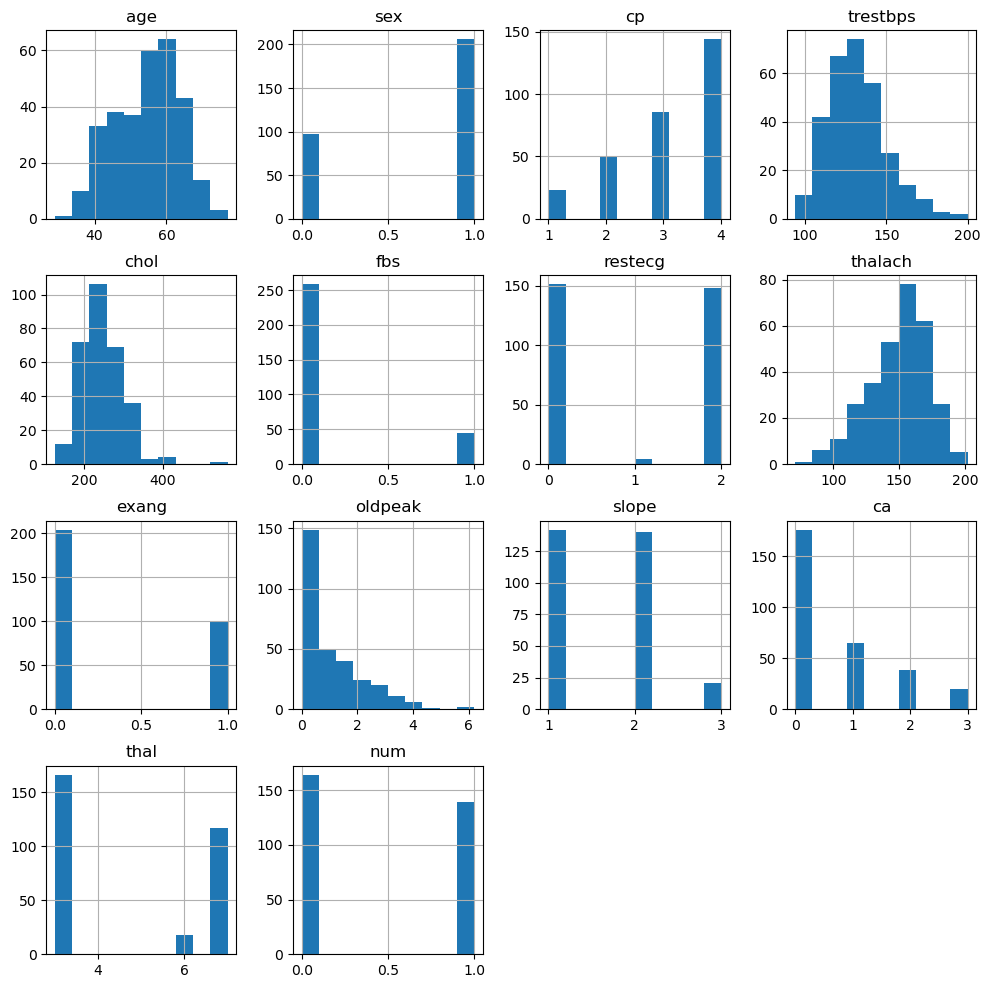

In [9]:
# Printing histogram 
heartDisease_combined.hist(figsize = (12,12))
plt.savefig('featuresplot')

- It is observed that some features are skewed towards certain values, making the data not normalised (e.g. oldpeak is less than median)

# Preprocessing Steps (Handling missing values and Outliers)

### Handling missing values 
- Imputes the rows with NaN values with median (for both SVM and Logistic Regression)

In [10]:
# Examining missing values
print("Missing value distribution")
print("For features:")
print(X.isnull().mean()) # tells us that missing values are found in columns 1% in 'ca' and 0.7% in 'thal', which are very low and thus allows dropping
print(" ")
print("For labels")
print(z.isnull().mean())

heartDisease_combined = pd.concat([X,z], axis=1) # combines labels and features into one DF

########################
# To impute with median
heartDisease_combined['ca'].fillna(heartDisease_combined['ca'].median(), inplace=True) # imputing missing values with median. note that we do it for 'ca' and 'thal', the only columns with missing values
heartDisease_combined['thal'].fillna(heartDisease_combined['thal'].median(), inplace=True)

print("Checking if cleaned dataset contains missing values")
print(heartDisease_combined.isnull().mean())

Missing value distribution
For features:
age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          0.013201
thal        0.006601
dtype: float64
 
For labels
num    0.0
dtype: float64
Checking if cleaned dataset contains missing values
age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64


### Handling Outliers
- Drop rows with outliers (for both SVM and Logistic Regression)

In [11]:
def impute_outliers_with_median(df, column_name):
    median = np.median(df[column_name]) # calculate median within column
    
    percentile25 = df[column_name].quantile(0.25) # calculates quartiles, then IQR for outlier detection
    percentile75 = df[column_name].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    
    outliers = df[(df[column_name] > upper_limit) | (df[column_name] < lower_limit)] # identifying outliers
    outliers
    
    if not outliers.empty: # prints outliers for reference
        print("Outliers found in column '{}':".format(column_name))
        print(outliers)

    ##################
    # drop rows with outliers
    df.drop(index=outliers.index, inplace=True) 
    
    return df

# applies function to all columns by iterating through all columns of continuous features
for columns in cont_feat:
    heartDisease_combined = impute_outliers_with_median(heartDisease_combined, columns)

Outliers found in column 'trestbps':
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
14    52    1   3       172   199    1        0      162      0      0.5   
83    68    1   3       180   274    1        2      150      1      1.6   
126   56    0   4       200   288    1        2      133      1      4.0   
172   59    0   4       174   249    0        0      143      1      0.0   
183   59    1   1       178   270    0        2      145      0      4.2   
188   54    1   2       192   283    0        2      195      0      0.0   
201   64    0   4       180   325    0        0      154      1      0.0   
213   66    0   4       178   228    1        0      165      1      1.0   
231   55    0   4       180   327    0        1      117      1      3.4   

     slope   ca  thal  num  
14       1  0.0   7.0    0  
83       2  0.0   7.0    1  
126      3  2.0   7.0    1  
172      2  0.0   3.0    1  
183      3  0.0   7.0    0  
188      1  1.0   7.0    1  

# Training & Testing Dataset
- Data will be split to test 20%, training 80%, with a random state of 42

In [12]:
X = heartDisease_combined.drop(['num'], axis = 1)
y = heartDisease_combined['num']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape

((227, 13), (57, 13))

### Normalisation
- Data is scaled using StandardScalar( ) from sklearn to normal the data

In [13]:
cols = X_train.columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns = cols)
X_test = pd.DataFrame(X_test_scaled, columns = cols)
X_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02
mean,-3.208398e-16,-7.434092e-17,-1.878087e-16,7.590600e-16,-7.238458e-17,-4.695216e-17,4.890850e-17,2.151974e-16,-4.695216e-17,8.607897e-17,1.565072e-17,-7.629727e-17,9.390433e-17
std,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00
min,-2.640291e+00,-1.595893e+00,-2.099874e+00,-2.275130e+00,-2.559258e+00,-4.124356e-01,-1.000020e+00,-2.704667e+00,-6.815542e-01,-8.955340e-01,-9.674054e-01,-7.181061e-01,-8.822699e-01
25%,-8.518265e-01,-1.595893e+00,-1.089977e+00,-5.977012e-01,-7.225756e-01,-4.124356e-01,-1.000020e+00,-7.352881e-01,-6.815542e-01,-8.955340e-01,-9.674054e-01,-7.181061e-01,-8.822699e-01
50%,9.500785e-02,6.266084e-01,-8.007992e-02,4.746367e-02,-2.822021e-02,-4.124356e-01,4.424865e-03,1.276982e-01,-6.815542e-01,-2.970466e-01,7.218333e-01,-7.181061e-01,-8.822699e-01
75%,7.262308e-01,6.266084e-01,9.298169e-01,6.926286e-01,6.437366e-01,-4.124356e-01,1.008869e+00,7.030224e-01,1.467235e+00,5.009366e-01,7.218333e-01,3.984013e-01,1.177116e+00
max,2.409492e+00,6.266084e-01,9.298169e-01,2.628123e+00,2.547614e+00,2.424621e+00,1.008869e+00,2.340484e+00,1.467235e+00,3.094382e+00,2.411072e+00,2.631416e+00,1.177116e+00


# Support Vector Machine

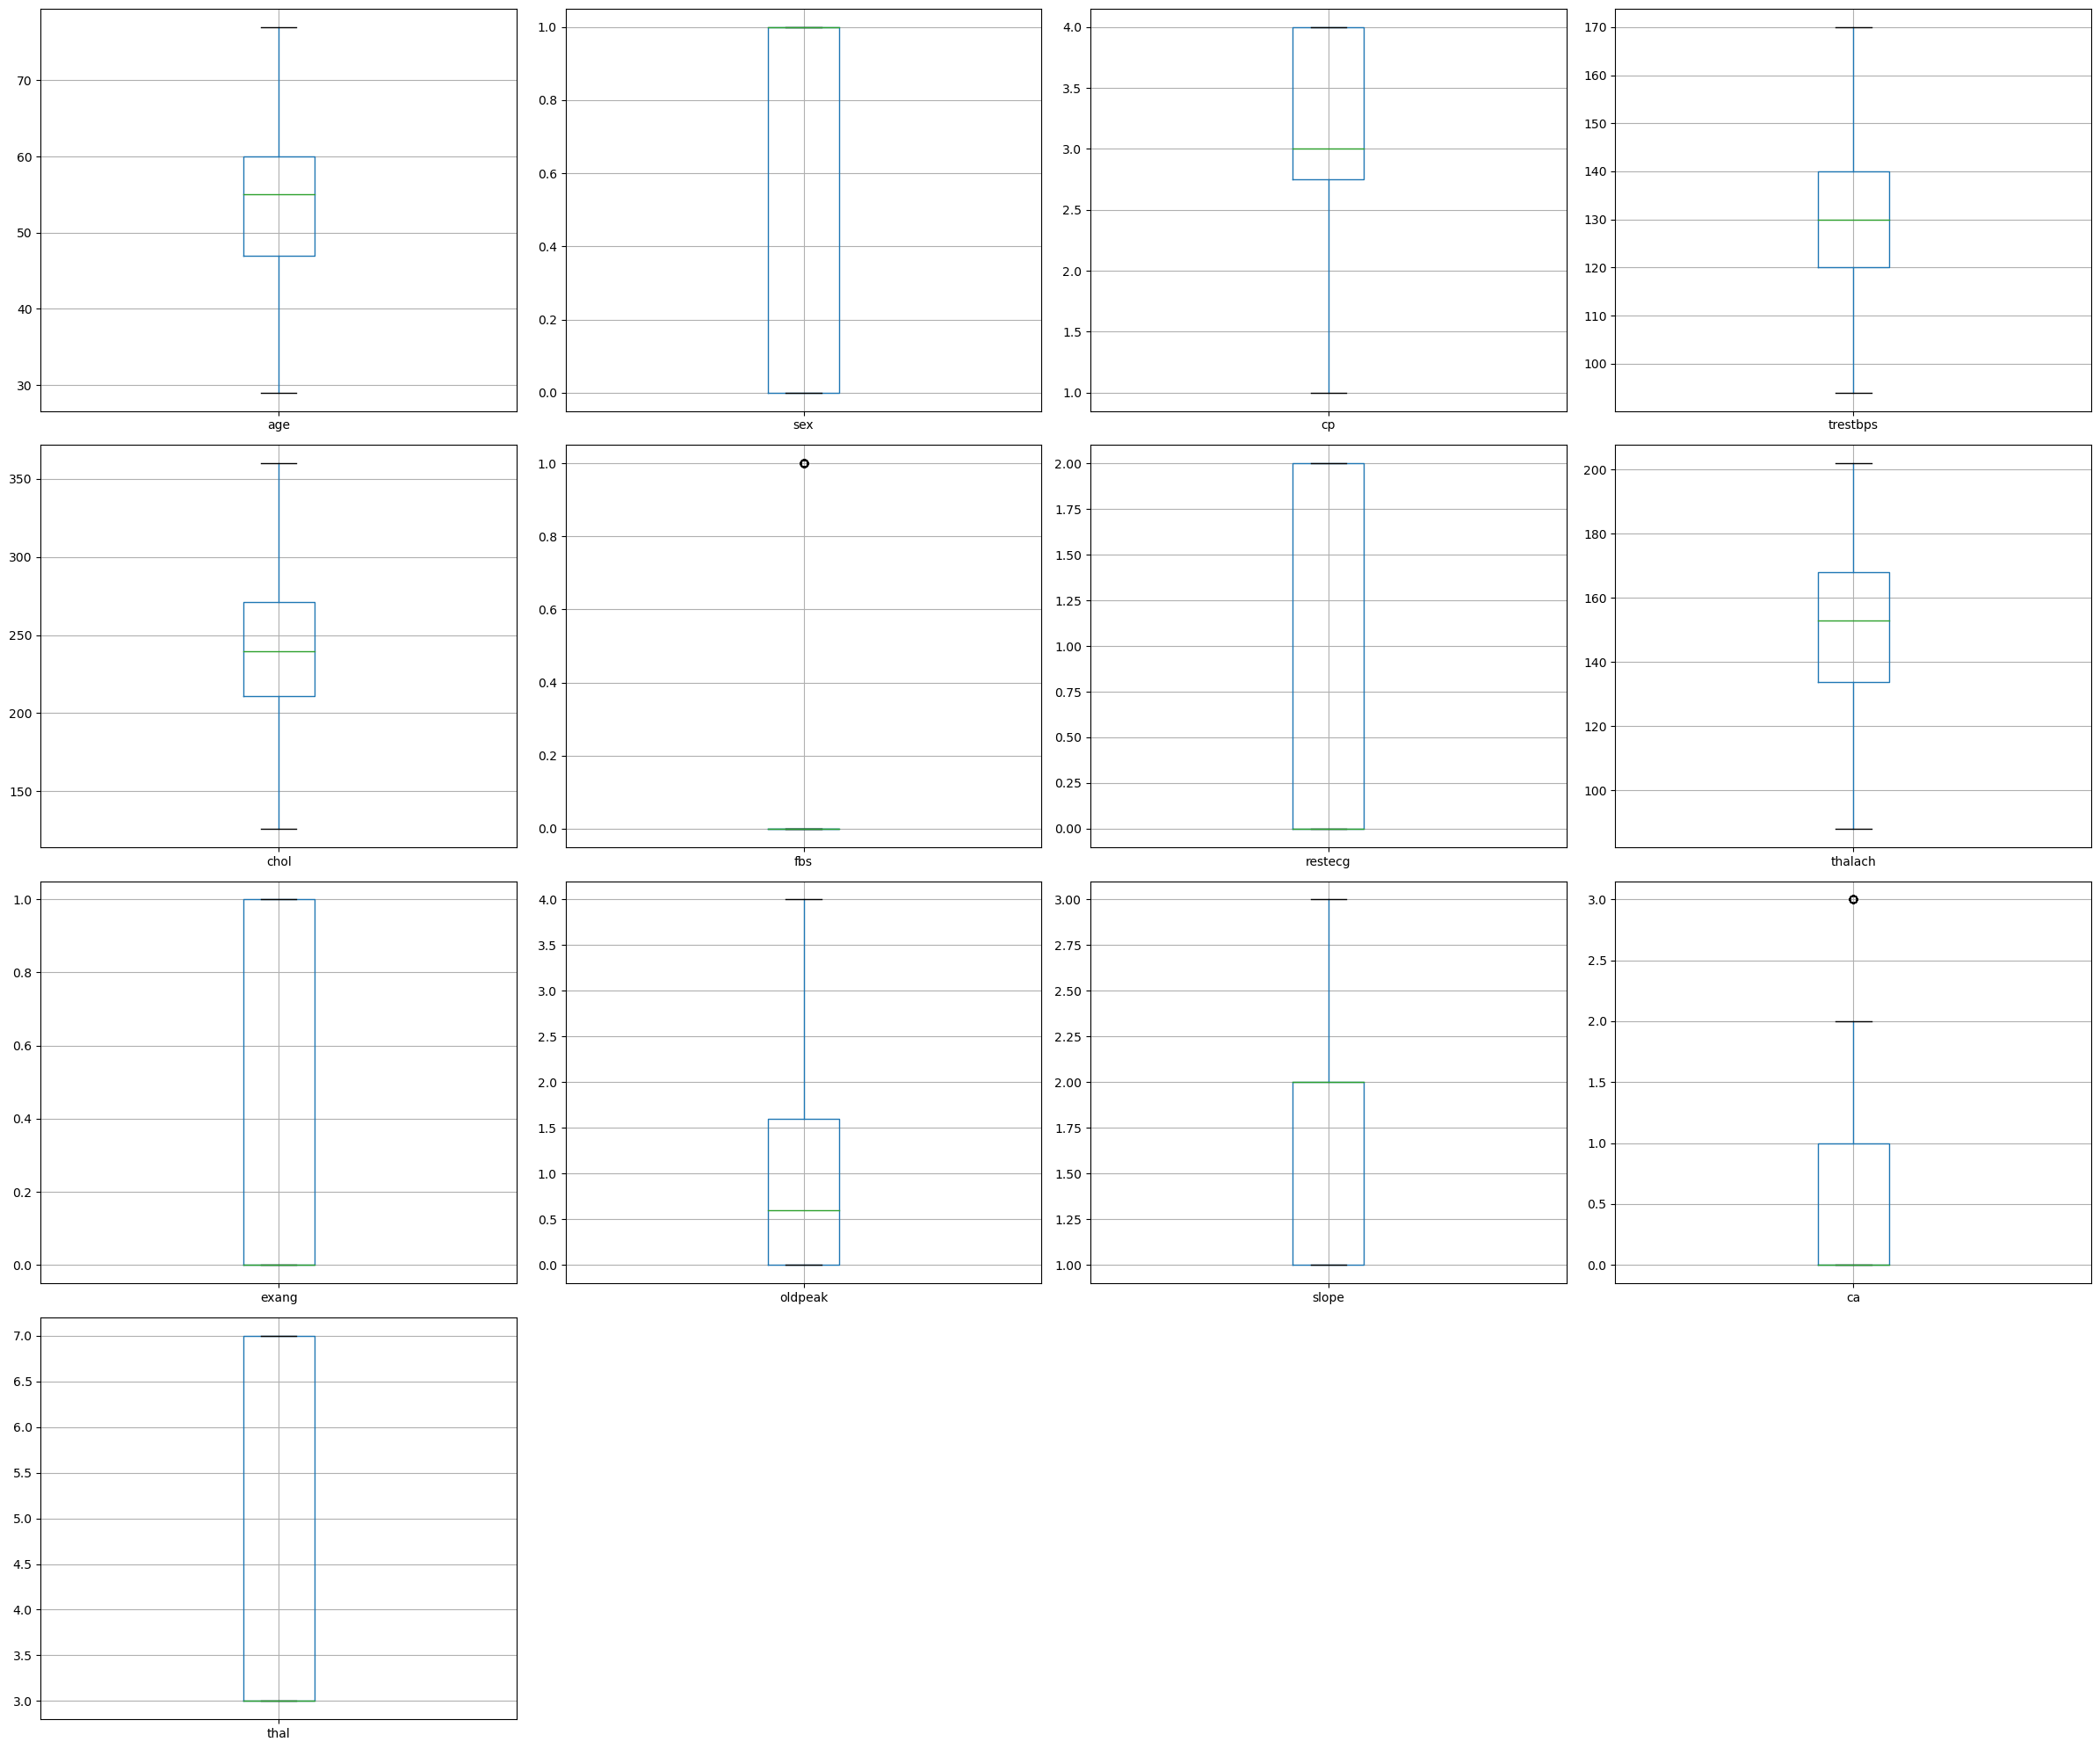

In [14]:
#Boxplot to check normalisation
from sklearn import svm
plt.figure(figsize = (24,20))

heartDisease_combined
heartDisease_combined.columns = heartDisease_combined.columns.str.strip()
heartDisease_combined.columns

heartDisease_combined.isnull().sum()

round(heartDisease_combined.describe(), 2)

features = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']

num_rows = 4
num_cols = 4

#Prints boxplot for each feature 
for i, feat in enumerate(features, start = 1):
    plt.subplot(num_rows, num_cols, i)
    fig = heartDisease_combined.boxplot(column = feat)
    fig.set_title('')
    fig.set_ylabel('')
    
plt.tight_layout()
plt.show()

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Testing Accuracy for SVM: 0.8596491228070176


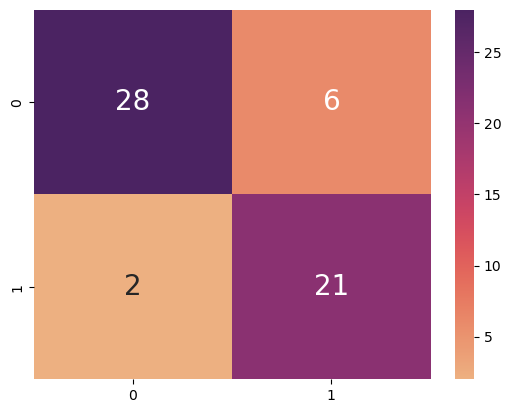

In [16]:
# instantiate classifier with linear kernel and C=1
linear_svc = SVC(kernel = 'linear', C = 1, random_state = 42) 

# fit classifier to training set
linear_svc.fit(X_train,y_train)

# make predictions on test set
y_pred_svm = linear_svc.predict(X_test)
lscm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(lscm, annot = True, cmap = 'flare', annot_kws = {"size": 20} )
TP = lscm [0][0]
TN = lscm[1][1]
FN = lscm[1][0]
FP = lscm[0][1]

# compute and print accuracy score
print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))

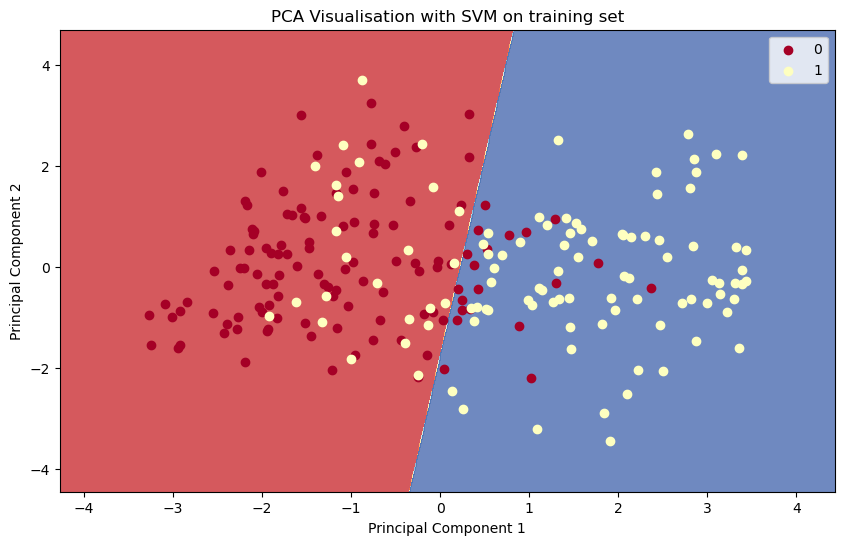

In [17]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Applying PCA
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Fitting SVM to the training set
classifier = SVC(kernel = 'linear', C = 1, random_state = 42)
classifier.fit(X_train_pca, y_train)

# Predicting the test set results
y_pred_pca = classifier.predict(X_test_pca)

# Visualising PCA with SVM's decision boundary
plt.figure(figsize = (10, 6))
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = plt.cm.RdYlBu)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = plt.cm.RdYlBu(i / len(np.unique(y_set))), label=j)
plt.title('PCA Visualisation with SVM on training set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

Testing Accuracy for SVM: 0.801762114537445


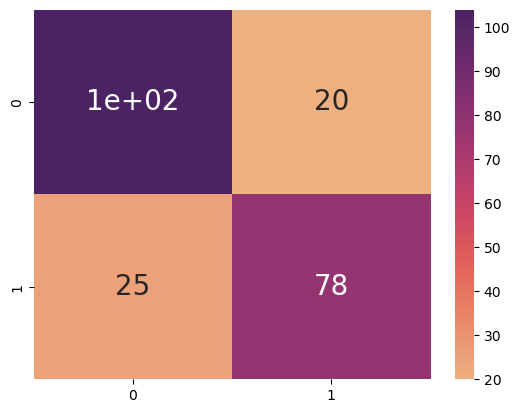

In [18]:
# Training set accuracy
y_train_pred_pca = classifier.predict(X_train_pca)
accuracy = accuracy_score(y_train, y_train_pred_pca)
pca_svm_train = confusion_matrix(y_train, y_train_pred_pca)

sns.heatmap(pca_svm_train, annot = True, cmap = 'flare', annot_kws = {"size": 20} )
TP = pca_svm_train [0][0]
TN = pca_svm_train[1][1]
FN = pca_svm_train[1][0]
FP = pca_svm_train[0][1]

print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))

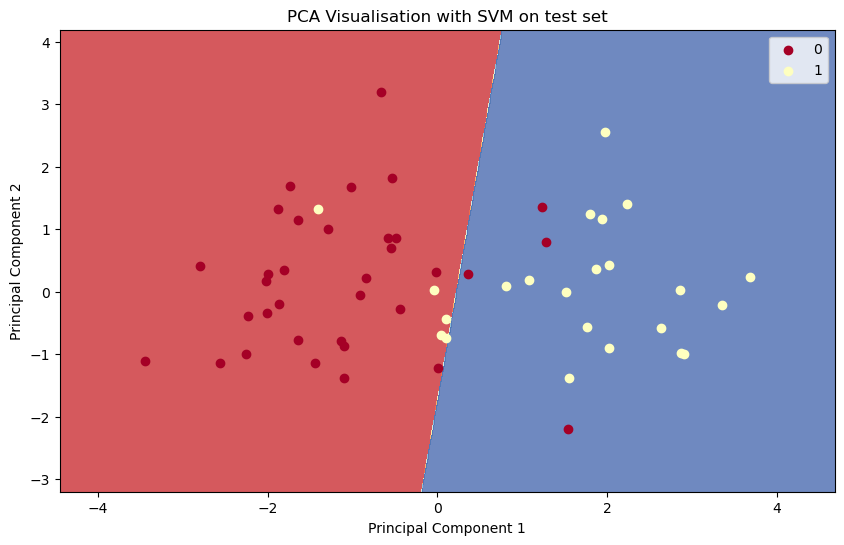

In [19]:
# Visualising PCA on test set

plt.figure(figsize = (10, 6))
X_set, y_set = X_test_pca, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = plt.cm.RdYlBu)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = plt.cm.RdYlBu(i / len(np.unique(y_set))), label = j)
plt.title('PCA Visualisation with SVM on test set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

Testing Accuracy for SVM: 0.8421052631578947


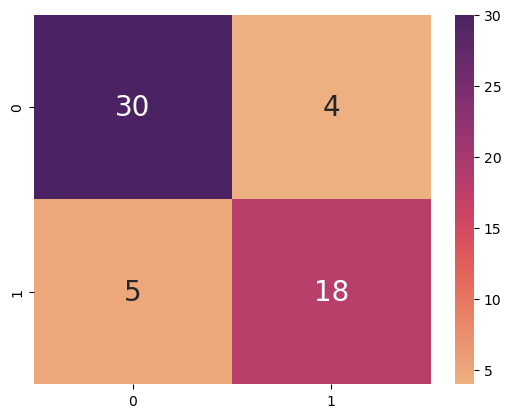

In [20]:
# Test set accuracy
accuracy = accuracy_score(y_test, y_pred_pca)
pca_svm_test = confusion_matrix(y_test, y_pred_pca)

sns.heatmap(pca_svm_test, annot = True, cmap = 'flare', annot_kws = {"size": 20} )
TP = pca_svm_test[0][0]
TN = pca_svm_test[1][1]
FN = pca_svm_test[1][0]
FP = pca_svm_test[0][1]

print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))

### Accuracy from PCA and SVM
- Accuracy increased from training set to test set
- In comparison to accuracy computed in SVM, the drop could be due to loss of information from PCA (from reducing dimensionality)

### Feature Importance (SVM)
- uses chi-squared statistical tests to compute feature importance

In [21]:
# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func = chi2, k = 10)
fit = bestfeatures.fit(X,y)
HDscores = pd.DataFrame(fit.scores_)
HDcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([HDcolumns, HDscores], axis = 1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print best features

       Specs       Score
7    thalach  170.514220
11        ca   74.514312
12      thal   63.531126
9    oldpeak   57.766901
8      exang   35.470265
4       chol   28.538897
0        age   21.902724
2         cp   13.840949
6    restecg    9.597195
1        sex    8.312017
3   trestbps    7.719927
10     slope    6.684517


[0.0707099  0.04416791 0.10714252 0.0651341  0.0684141  0.02141993
 0.0336969  0.0805936  0.08417085 0.08287106 0.04985603 0.12651752
 0.16530557]


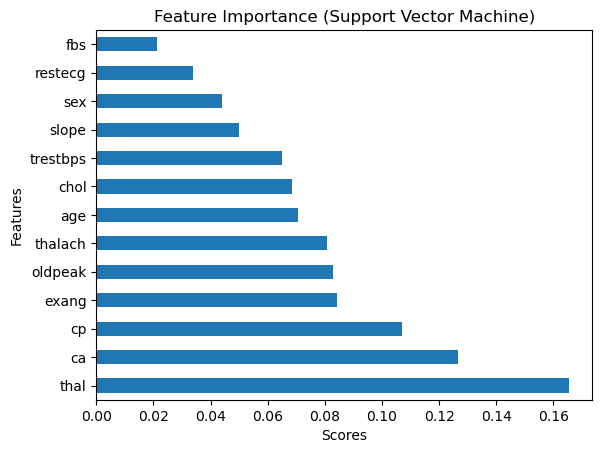

In [22]:
# Plotting feature importance
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(13).plot(kind = 'barh')
plt.title('Feature Importance (Support Vector Machine)')
plt.xlabel('Scores')
plt.ylabel('Features')
plt.show()

# Logistic Regression

Testing Accuracy for Logistic Regression: 0.8596491228070176


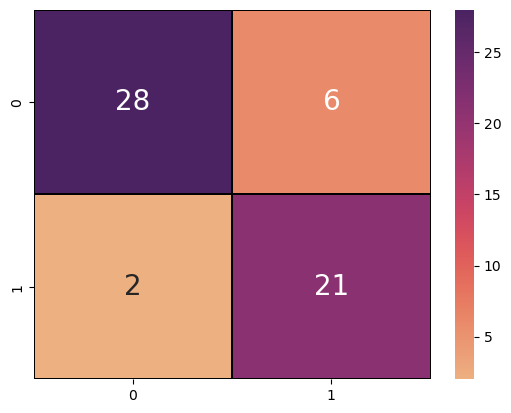

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr = LogisticRegression(C = 0.1, intercept_scaling = 1, solver ='liblinear').fit(X_train,y_train)

log_regression = lr.fit(X_train,y_train)
y_pred_lr = log_regression.predict(X_test)

lrcm = confusion_matrix(y_test,y_pred_lr)
lrcm
sns.heatmap(lrcm, annot = True, cmap = 'flare', linewidths = 0.3, linecolor = 'black', annot_kws = {"size": 20})
TP = lrcm[0][0]
TN = lrcm[1][1]
FN = lrcm[1][0]
FP = lrcm[0][1]

print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))

In [24]:
# # Fitting Logistic Regression to the training set
# log_reg_classifier = LogisticRegression()
# log_reg_classifier.fit(X_train_pca, y_train)

# Predicting the training set results
y_train_pred_lr = log_regression.predict(X_train)

# Calculating the accuracy of logistic regression on the training set
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)

print("Training Set Accuracy (Logistic Regression):", train_accuracy_lr)

Training Set Accuracy (Logistic Regression): 0.8590308370044053


### Feature Importance (Logistic Regression)
- uses absolute values of the coefficients of the logistic regression model to compute feature importance

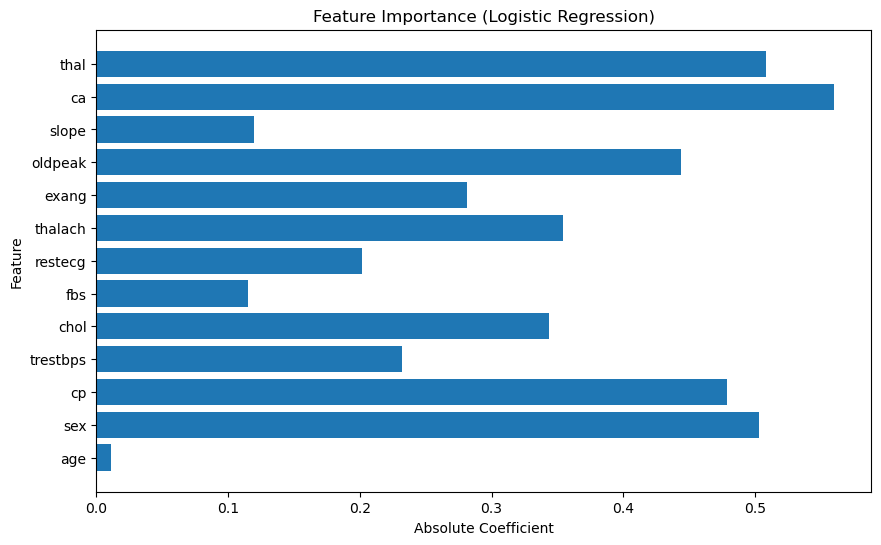

In [25]:
# Get feature coefficients
coefficients = log_regression.coef_[0]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(coefficients)), np.abs(coefficients), align='center')
plt.yticks(range(len(coefficients)), X)
plt.title('Feature Importance (Logistic Regression)')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()